#### Analysis of a single stock

Goal: Take 1 stock and run a trendline through 1 year. Assess the theoretical performance of adjusting weekly contributions as compared to contributing a consistent amount every week.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn
import numpy as np

In [2]:
# AAPL, AMD, AMZN, CRM, GOOG, MSFT, NVDA, TSLA

stock = yf.Ticker("amd")

In [3]:
# pull data

# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

df = stock.history(period="1y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-31,85.050003,92.639999,85.050003,90.820000,90655900,0,0
2020-09-01,91.919998,92.510002,90.190002,92.180000,55825600,0,0
2020-09-02,94.010002,94.279999,88.739998,90.220001,50366900,0,0
2020-09-03,87.839996,88.470001,81.589996,82.540001,87462700,0,0
2020-09-04,81.449997,84.389999,76.330002,82.010002,82267800,0,0
...,...,...,...,...,...,...,...
2021-08-25,108.129997,109.910004,107.449997,108.300003,45485500,0,0
2021-08-26,108.570000,109.230003,106.839996,107.269997,51442500,0,0
2021-08-27,108.010002,111.779999,107.800003,111.400002,60970800,0,0


In [4]:
# add index to df

df = pd.DataFrame(df['Close'])
add = np.arange(1,len(df)+1)

df['Index'] = add

df

,Close,Index
Date,,
2020-08-31,90.820000,1
2020-09-01,92.180000,2
2020-09-02,90.220001,3
2020-09-03,82.540001,4
2020-09-04,82.010002,5
...,...,...
2021-08-25,108.300003,249
2021-08-26,107.269997,250
2021-08-27,111.400002,251


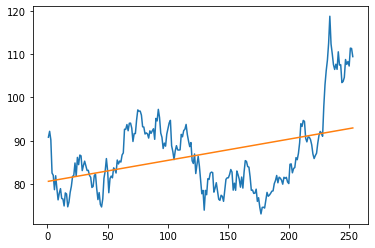

In [5]:
# plot data with a trendline

x = df['Index']
y = df['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


In [6]:
# create pred list w/ index

nlist = []

for i in range(1,len(df)+1):
    d = m*i+b
    nlist.append(d)
    
pred = pd.DataFrame(nlist, columns = ['Pred'])

add = np.arange(1,len(df)+1)

pred['Index'] = add
pred

,Pred,Index
0,80.627505,1
1,80.676417,2
2,80.725329,3
3,80.774241,4
4,80.823152,5
...,...,...
248,92.757638,249
249,92.806550,250
250,92.855462,251
251,92.904374,252


In [7]:
# create pred/close list w/ index

nlist = []
ylist = []

for i in range(1,len(df)+1):
    d = (pred['Pred'].iloc[i-1])/(df['Close'].iloc[i-1])
    nlist.append(d)
    
pred_calc = pd.DataFrame(nlist, columns = ['Pred/Close'])
pred_calc

add = np.arange(1,len(df)+1)

pred_calc['Index'] = add
pred_calc

,Pred/Close,Index
0,0.887773,1
1,0.875205,2
2,0.894761,3
3,0.978607,4
4,0.985528,5
...,...,...
248,0.856488,249
249,0.865168,250
250,0.833532,251
251,0.834570,252


In [8]:
# merge close, pred, and pred/close on index

df = pd.merge(left=df, right=pred, left_on='Index', right_on='Index')
df = pd.merge(left=df, right=pred_calc, left_on='Index', right_on='Index')

df.shape
df

,Close,Index,Pred,Pred/Close
0,90.820000,1,80.627505,0.887773
1,92.180000,2,80.676417,0.875205
2,90.220001,3,80.725329,0.894761
3,82.540001,4,80.774241,0.978607
4,82.010002,5,80.823152,0.985528
...,...,...,...,...
248,108.300003,249,92.757638,0.856488
249,107.269997,250,92.806550,0.865168
250,111.400002,251,92.855462,0.833532
251,111.320000,252,92.904374,0.834570


In [9]:
# Is the stock currently higher than the pedicted?
# >1 = prediction is higher
# <1 = stock is higher

df['Pred/Close'].iloc[len(df)-1]

0.8493538333964372